🛰️ Sentinel-1 InSAR Displacement Map Generator
----------------------------------------------

📂 Opening file: D:\Downloads\S1-GUNW-A-R-018-tops-20230528_20230516-232801-00072W_00037S-PP-2468-v2_0_6.nc


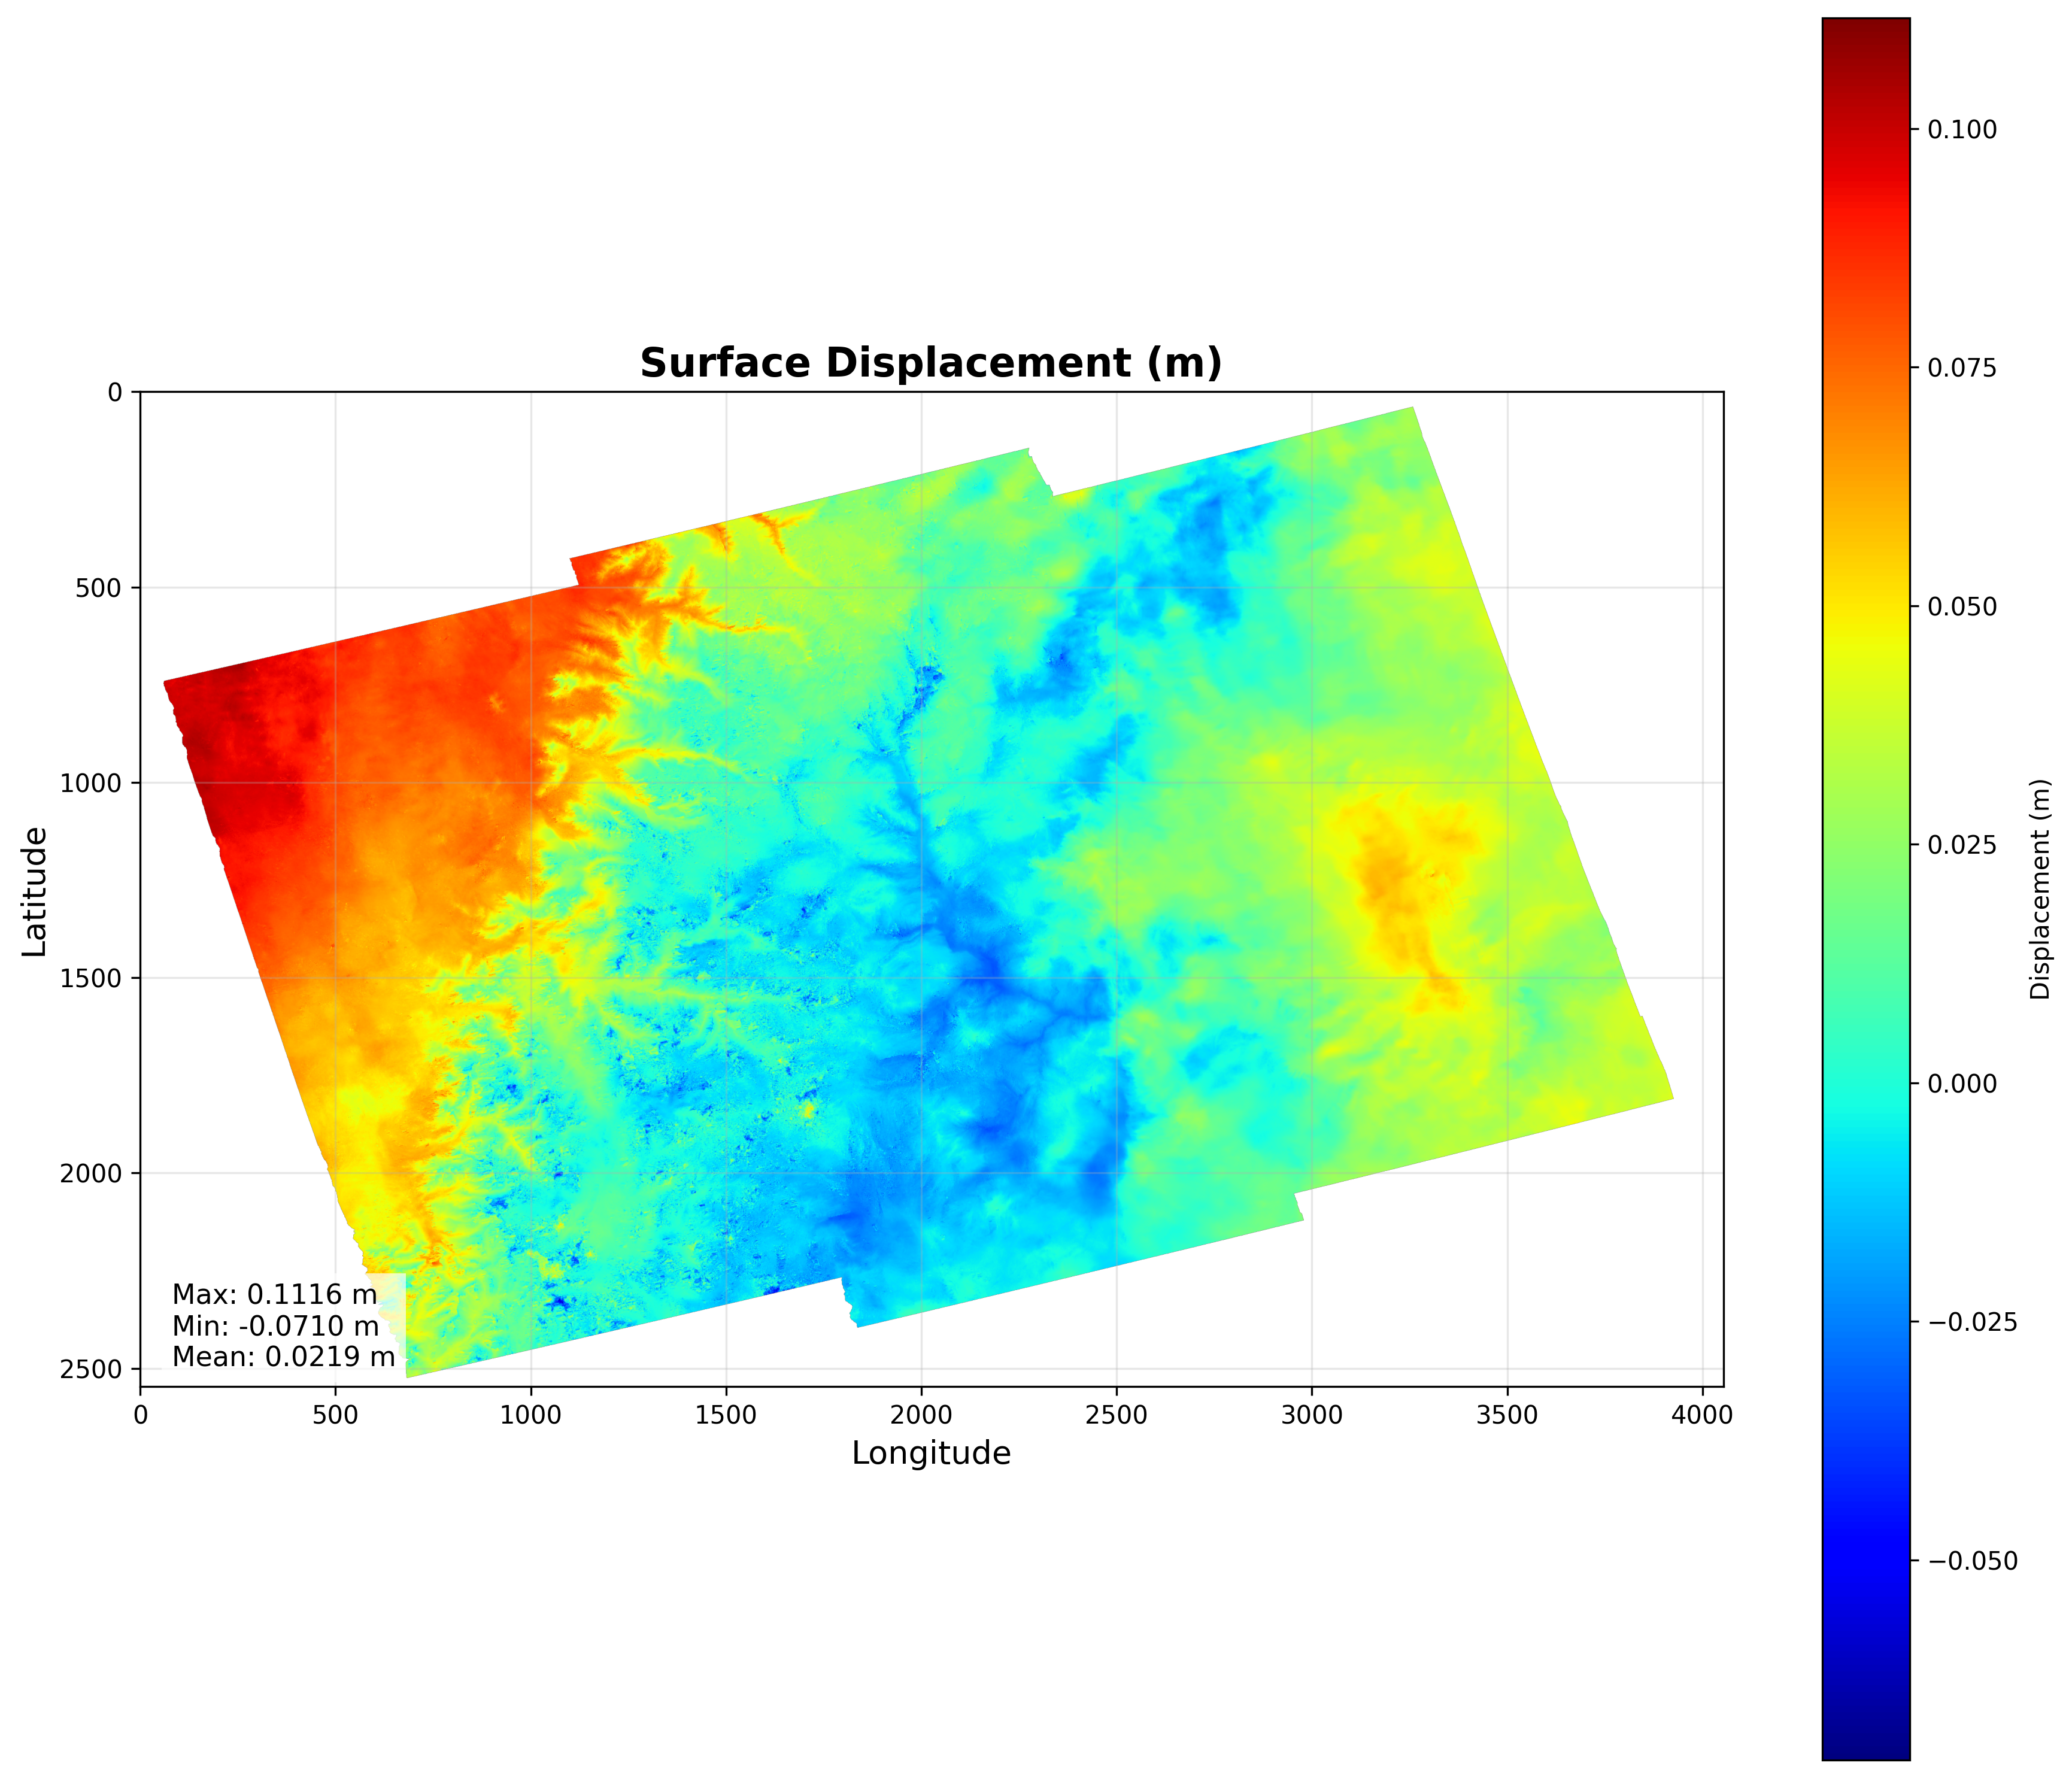


✅ High-resolution displacement map saved at:
   D:\Downloads\displacement_map_highres.tiff



In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os
import netCDF4

def process_insar_file(file_path):
    try:
        print(f"\n📂 Opening file: {file_path}")
        ds = xr.open_dataset(file_path, group='science/grids/data')
        unwrapped_phase = ds['unwrappedPhase']

        wavelength = 0.056  # meters (C-band)
        displacement = (unwrapped_phase * wavelength) / (4 * np.pi)

        max_disp = float(displacement.max())
        min_disp = float(displacement.min())
        mean_disp = float(displacement.mean())

        plt.figure(figsize=(12, 10), dpi=300)
        im = plt.imshow(displacement, cmap='jet', interpolation='bilinear')
        cbar = plt.colorbar(im, label="Displacement (m)")
        plt.title("Surface Displacement (m)", fontsize=16, weight='bold')
        plt.xlabel("Longitude", fontsize=13)
        plt.ylabel("Latitude", fontsize=13)

        plt.text(
            0.02, 0.02,
            f"Max: {max_disp:.4f} m\nMin: {min_disp:.4f} m\nMean: {mean_disp:.4f} m",
            transform=plt.gca().transAxes,
            fontsize=11,
            color='black',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')
        )

        plt.grid(alpha=0.3)
        plt.tight_layout()

        output_path = os.path.join(os.path.dirname(file_path), "displacement_map_highres.tiff")
        plt.savefig(output_path, dpi=400, bbox_inches='tight')
        plt.show()

        print(f"\n✅ High-resolution displacement map saved at:\n   {output_path}\n")

    except Exception as e:
        print(f"❌ Error processing file: {e}")

if __name__ == "__main__":
    print("🛰️ Sentinel-1 InSAR Displacement Map Generator")
    print("----------------------------------------------")
    file_path = input("📁 Enter path to your .nc file (you can drag it here): ").strip('"')

    if not os.path.isfile(file_path):
        print("❌ File not found. Please check the path and try again.")
    else:
        process_insar_file(file_path)
